<a href="https://colab.research.google.com/github/gosantam/Tablas/blob/main/Librer%C3%ADas_Externas/CascadeTabNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo CascadeTabNet

- https://github.com/DevashishPrasad/CascadeTabNet
- https://arxiv.org/ftp/arxiv/papers/2004/2004.12629.pdf
- https://github.com/doc-analysis/TableBank
- Parece que funciona razonablemente bien

## Librerías

- Tarda un poco. Luego hay que reiniciar el entorno de ejecución

In [ ]:
%%capture
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 

- Depués de ejecutar la celda de abajo, volver a reiniciar el entorno

In [ ]:
%%capture
!pip install mmcv==0.4.3

In [ ]:
%%capture
!!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

In [ ]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
100% 664M/664M [00:04<00:00, 164MB/s]


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import json
import cv2
from pathlib import Path
import matplotlib.pylab as plt
import numpy as np
import PIL

In [ ]:
def mostrarImagen(imagen):
    if len(imagen.shape)==3:
        img2= cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        # o equivalentemente, img2 = imagen[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)
        plt.show()

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

## Ejemplo de cómo usarlo

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


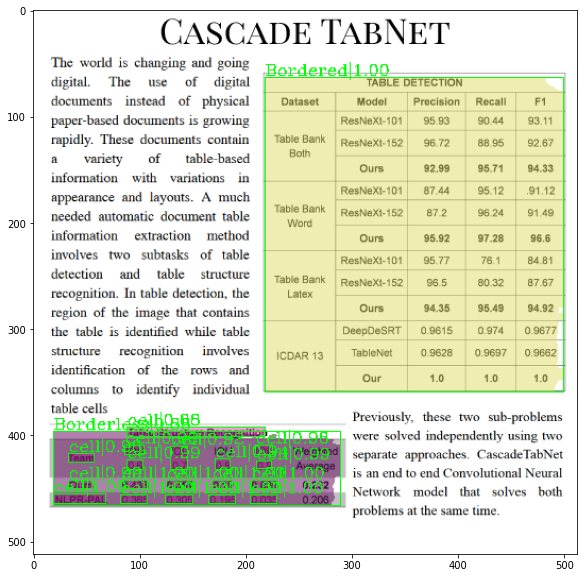

In [ ]:
# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
img = "/content/CascadeTabNet/Demo/demo.png"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


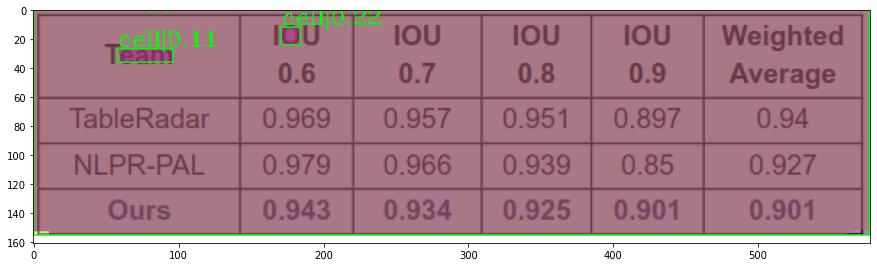

In [ ]:
# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
img = "/content/CascadeTabNet/imgs/icdar 19.png"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.1)

## Dataset

- Imágenes con sus localizaciones en el formato YOLO

In [ ]:
%%capture
!wget https://www.dropbox.com/s/4iw05m7h0yvbogh/datasetYOLO.zip?dl=1 -O datasetYOLO.zip
!unzip datasetYOLO

## Probando con nuestras imágenes
- No está preparado paralas imágenes de tablas recortadas

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


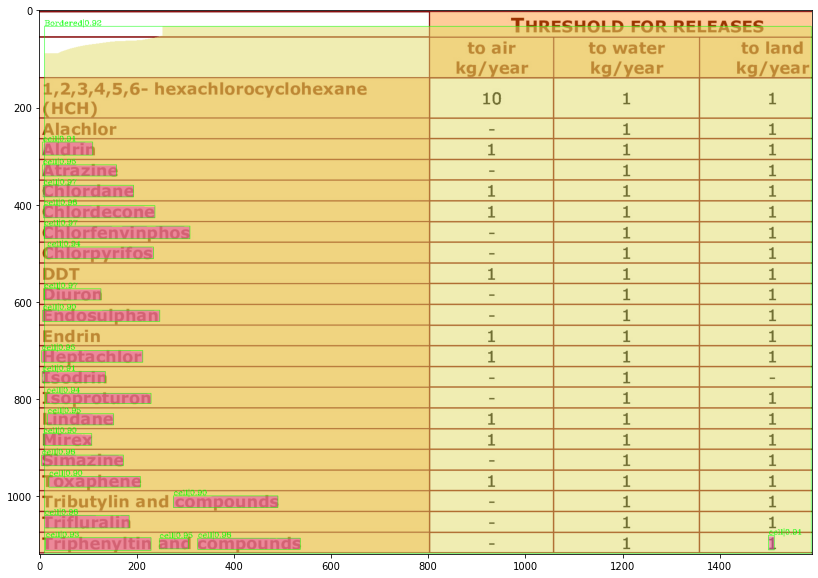

In [ ]:
# Test a single image 
img = "/content/datasetYOLO/train/eu-001-2-4.jpg"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


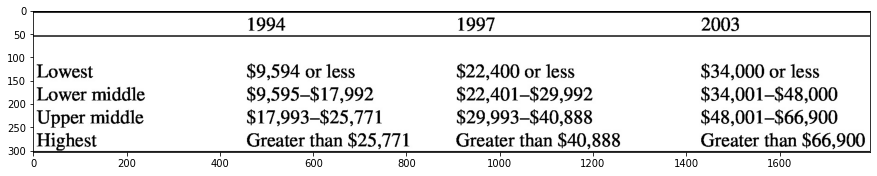

In [ ]:
# Test a single image 
img = "/content/datasetYOLO/test/us-003-1-1.jpg"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

## Probando con imágenes del marmot dataset

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


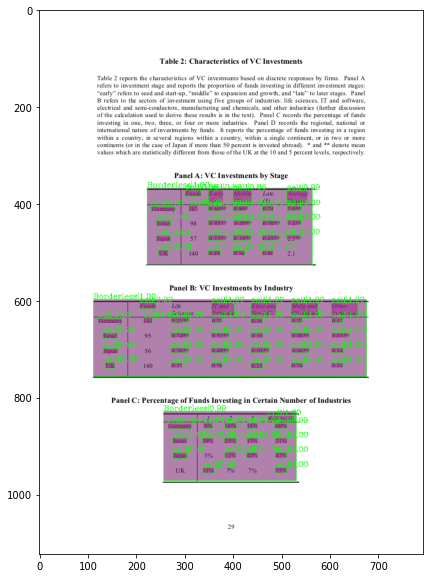

In [ ]:
# Test a single image 
img = "/content/10.1.1.1.2023_31.bmp"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


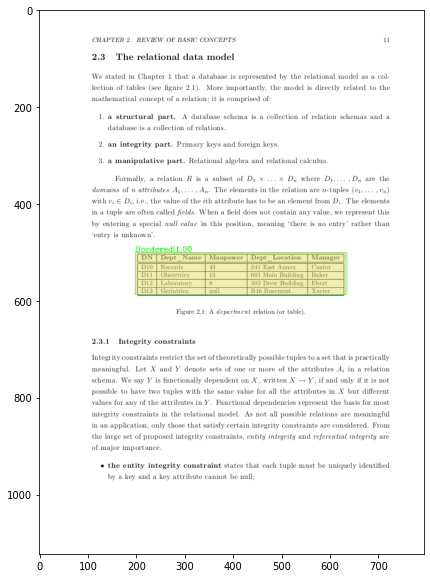

In [ ]:
# Test a single image 
img = "/content/10.1.1.1.2031_24.bmp"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

## Probando con alguna imagen de internet

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


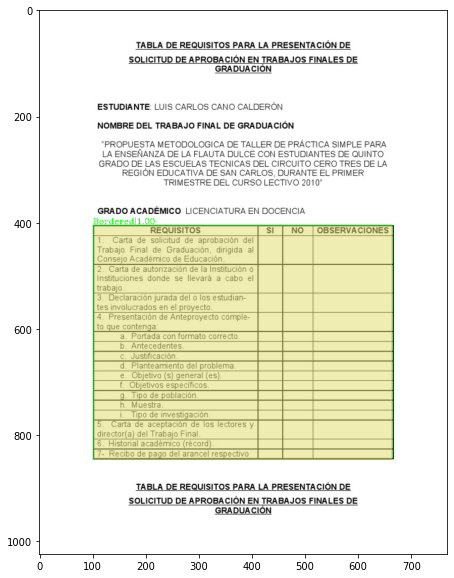

In [ ]:
# Test a single image 
img = "/content/prueba.jpg"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

## Table Structure Recognition(TSR)

In [ ]:
%%capture
!!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

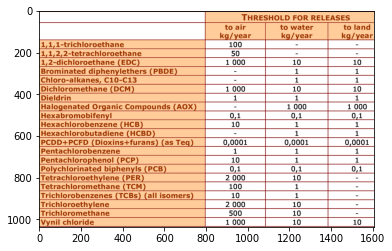

In [ ]:
img = cv2.imread(anoTrain[0]['file'])
mostrarImagen(img)

In [ ]:
print(anoTrain[0]['file'])

datasetYOLO/train/eu-001-2-5.jpg


In [ ]:
!python CascadeTabNet/TableStructureRecognition/main.py

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
[Table status] : Processing table with lines
tcmalloc: large alloc 1233903616 bytes == 0x5584e4520000 @  0x7eff89306615 0x55847f926bfd 0x55847f81888a 0x55847f80d2ed 0x55847f8fee1d 0x55847f880e99 0x55847f87b9ee 0x55847f80ebda 0x55847f87c915 0x55847f80eafa 0x55847f87c915 0x55847f87b9ee 0x55847f87b6f3 0x55847f9454c2 0x55847f94583d 0x55847f9456e6 0x55847f91d163 0x55847f91ce0c 0x7eff880efbf7 0x55847f91ccea
tcmalloc: large alloc 1542381568 bytes == 0x5585771da000 @  0x7eff89306615 0x55847f926bfd 0x55847f81888a 0x55847f80d2ed 0x55847f8fee1d 0x55847f880e99 0x55847f87b9ee 0x55847f80ebda 0x55847f87c915 0x55847f80eafa 0x55847f87c915 0x55847f87b